# 라이브러리

In [1]:
!pip install -r requirements.txt

^C


In [1]:
from baseball_vision.PoseAnalysisProcessor import PoseAnalysisProcessor
from baseball_vision.InteractivePoseVisualizer import InteractivePoseVisualizer
import baseball_vision.tool as bvtool
import baseball_vision.draw_3d as d3d
import config
import os

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# 실행 부분

In [9]:
target_name = "이지헌"
video_name = "raw_data/" + target_name + ".mov"

tool = bvtool.PitcherAnalysisTool()
processor = PoseAnalysisProcessor(config.OUTPUT_DIR)
all_frames_3d_landmarks, fps = processor.process_video(video_name, target_name, tool)

MediaPipe Pose를 초기화합니다...
비디오 처리 시작...
처리 중: 100.00% (133/133 프레임)
비디오 객체를 해제합니다...


In [10]:
tool.show_dataframe()
tool.save(config.OUTPUT_DIR + "/" + target_name + "_angle_data")

     R Elbow  L Elbow  R Shoulder  L Shoulder  Body Twist  R Knee  L Knee
0     118.44   160.93       97.00      115.56        9.80  148.91  169.78
1     112.30   165.31       99.12      110.73        7.81  153.24  169.60
2     104.51   166.88       97.30      108.93        7.84  156.03  166.96
3      99.89   167.28       94.23      108.67        8.34  158.12  165.77
4      95.85   167.83       94.34      107.05        9.96  159.30  164.54
..       ...      ...         ...         ...         ...     ...     ...
128   105.58    58.70      107.58      121.72        8.91  141.56  164.00
129   105.65    58.70      107.80      121.47        8.91  143.05  166.23
130   106.41    58.64      108.01      121.08        8.78  143.97  167.78
131   108.19    18.75      108.33      120.70        8.60  146.03  168.03
132   110.59    18.09      108.82      120.31        8.29  147.84  168.19

[133 rows x 7 columns]


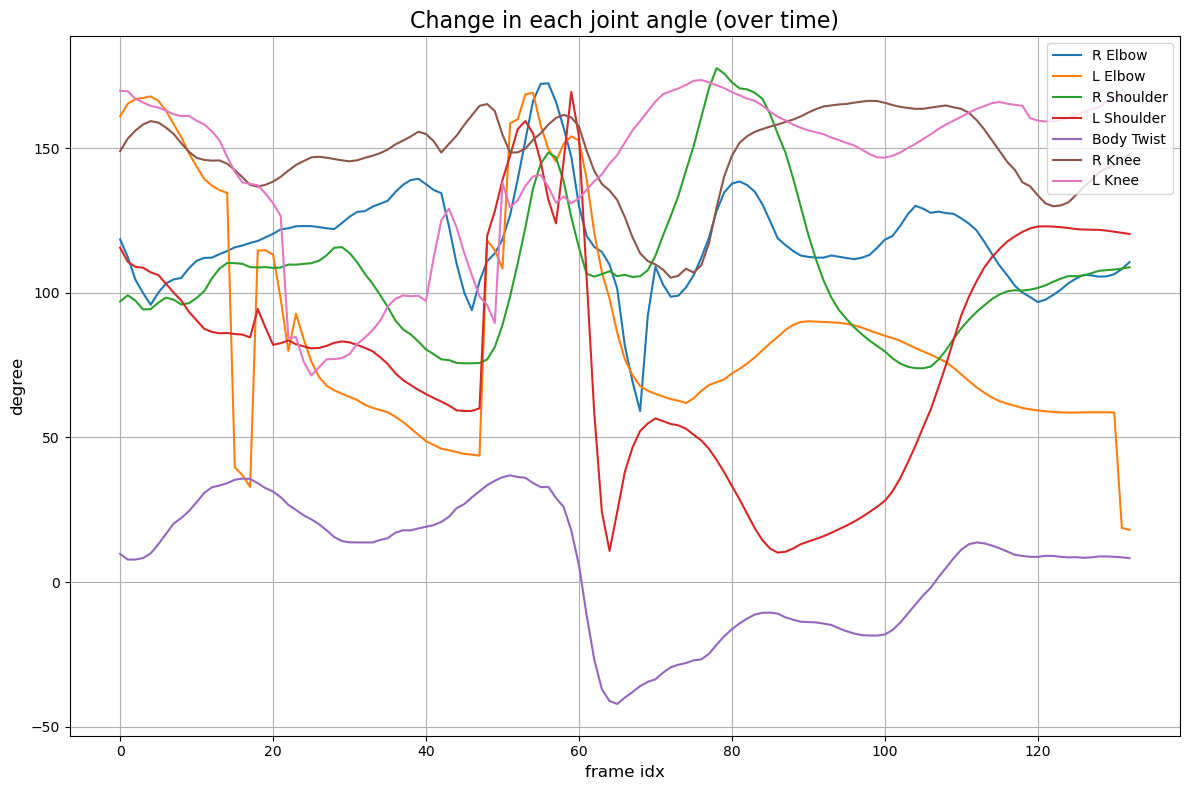

In [11]:
tool.show_graph()

In [4]:
# --- Export 3D data to C3D file ---
c3d_output_path = os.path.join(config.OUTPUT_DIR, target_name + '_3d_pose.c3d')
d3d.export_to_c3d(c3d_output_path, all_frames_3d_landmarks, fps)

총 159 프레임을 result_data\강두흔_3d_pose.c3d으로 성공적으로 내보냈습니다.


C:\Temp\Anaconda\Lib\site-packages\c3d\c3d.py:1210: UserWarning: missing parameter POINT:LABELS
  warnings.warn('missing parameter {}'.format(name))
C:\Temp\Anaconda\Lib\site-packages\c3d\c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [5]:
interactive_viz = InteractivePoseVisualizer(all_frames_3d_landmarks, fps)
#interactive_viz.run()
d3d.show_3d_video(all_frames_3d_landmarks, fps)

[Open3D INFO] Window window_0 created.
[Open3D INFO] ICE servers: ["stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"]
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.

--- 3D 인터랙티브 포즈 애니메이션 조작 방법 ---
  Spacebar: 재생/일시정지
  'A' 또는 Left Arrow: 이전 프레임
  'D' 또는 Right Arrow: 다음 프레임
  'W' 또는 Up Arrow: 재생 속도 증가
  'S' 또는 Down Arrow: 재생 속도 감소
  'R': 카메라 뷰 초기화
  'Q': 시각화 종료
---------------------------------------------
3D 시각화를 시작합니다. 창을 닫으면 종료됩니다.


Y/N n


3D 시각화가 종료되었습니다.
